In [191]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [192]:
df = pd.read_csv('Class_16_17//Linear Regression Bank Loans//datasets//LoansData.csv')

# PRE MODELING

In [193]:
# Lookinf at the first and last few rows.

df.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [194]:
df.tail()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
2495,2496,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,2497,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,2498,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,2499,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years
2499,2500,9000.0,5242.75,13.79%,36 months,debt_consolidation,6.76%,NY,RENT,3875.00,670-674,7.0,7589.0,0.0,10+ years


In [195]:
# Check for Duplicates

df.duplicated().sum()

0

In [196]:
# Check for Data Types

df.dtypes

LoanID                              int64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [197]:
df.shape

(2500, 15)

In [198]:
df.describe()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2500.00000,2499.000000,2499.000000,2499.000000,2497.000000,2497.000000,2497.000000
mean,1250.50000,12405.462185,12002.374186,5688.931321,10.072887,15223.184622,0.906688
std,721.83216,7802.933666,7746.767348,3963.118185,4.507416,18281.015258,1.231149
min,1.00000,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,625.75000,6000.000000,6000.000000,3500.000000,7.000000,5584.000000,0.000000
50%,1250.50000,10000.000000,10000.000000,5000.000000,9.000000,10948.000000,0.000000
75%,1875.25000,17000.000000,16000.000000,6800.000000,13.000000,18861.000000,1.000000
max,2500.00000,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


In [199]:
df.count()[df.count()<2500]

Amount.Requested                  2499
Amount.Funded.By.Investors        2499
Interest.Rate                     2498
Debt.To.Income.Ratio              2499
Home.Ownership                    2499
Monthly.Income                    2499
FICO.Range                        2498
Open.CREDIT.Lines                 2497
Revolving.CREDIT.Balance          2497
Inquiries.in.the.Last.6.Months    2497
Employment.Length                 2423
dtype: int64

In [200]:
# Find if data has Outliers

## Perfrom IQR method and check if there are any values below the LC and above the UC

# Understand distribution of data

# Finding the distrubiton of the Y var (plot a histogram)

# Find meaning of the special characters, 0, multiple numbers (999999) etc.

# We check for value_counts for each var and see if there are some odd characters that
# might mean something

# ! pip install  pandas_profiling

# or

# go to anaconda prompt and type:
# pip install pandas_profiling

# Check for the column names (if there are as per python convetions or not)

In [201]:
# install pandas-profiling

**Problems Identified**
- Column names are not according to Python naming rules.
- There are columns with wrong data type.
- There are variables with missing values.
- There are no special character.
- There are no duplicates.
- There are no variables with less variance.

## MODELING

#### Selection of the Algorithm
- We are selection Linear Regression as we want to know how the variabes impact the Y variable.

### <span style = 'color : green'> Data Preparation Level 1.

<span style = 'color: brown'> <b> Naming columns as the Python naming rule.

In [202]:
df.columns

Index(['LoanID', 'Amount.Requested', 'Amount.Funded.By.Investors',
       'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio',
       'State', 'Home.Ownership', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length'],
      dtype='object')

In [203]:
# we can't have dot in column name so we need to replace '.' whith '_'.

df.columns = df.columns.str.replace('.' , '_')

In [204]:
df.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


<span style = 'color: brown'> <b> Changing the data type in proper order (TYPE CASTING).

In [205]:
df.Interest_Rate = df.Interest_Rate.str.replace("%" , "").astype('float64')

In [206]:
df.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [207]:
df.Loan_Length = df.Loan_Length.str.replace(" months" , "").astype('int64')

In [208]:
df.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [209]:
df.Debt_To_Income_Ratio = df.Debt_To_Income_Ratio.str.replace("%" , "").astype('float64')

In [210]:
df.Employment_Length = df.Employment_Length.str.replace("< ","")
df.Employment_Length = df.Employment_Length.str.replace("years","")
df.Employment_Length = df.Employment_Length.str.replace(" year","")
df.Employment_Length = df.Employment_Length.str.replace("year","")
df.Employment_Length = df.Employment_Length.str.replace(" ","") 
df.Employment_Length = df.Employment_Length.str.replace("+","")
df.Employment_Length = df.Employment_Length.astype("float64")

In [211]:
df.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0
1,2,19200.0,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0
2,3,35000.0,35000.0,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0
3,4,10000.0,9975.0,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0
4,5,12000.0,12000.0,11.71,36,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0


In [212]:
df[['FICO_low' , 'FICO_high']] = df.FICO_Range.str.split('-' , expand = True)
df['FICO_Avg'] = (pd.to_numeric(df.FICO_low) + pd.to_numeric(df.FICO_high))/2
df['FICO_Avg']=pd.to_numeric(df['FICO_Avg'])

In [213]:
del df['FICO_Range']
del df['FICO_high']
del df['FICO_low']

In [214]:
df.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_Avg
0,1,20000.0,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,14.0,14272.0,2.0,1.0,737.0
1,2,19200.0,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,717.0
2,3,35000.0,35000.0,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,14.0,21977.0,1.0,2.0,692.0
3,4,10000.0,9975.0,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,10.0,9346.0,0.0,5.0,697.0
4,5,12000.0,12000.0,11.71,36,credit_card,18.78,NJ,RENT,3195.00,11.0,14469.0,0.0,9.0,697.0


<span style = 'color: brown'> <b>  Perform Missing Value Treatment and Outlier Capping + Encoding

##### Dividing the Data into Numerical and Categorical Data type.

In [215]:
# it will be better to get rid of 'LoanID' as it an id variable and it is of no use.

del df['LoanID']

**REMARK:** 
 -We generally don't perform any action on Y-variable like missing value treatment, we rather drop the row having missing value.

In [216]:
df.Interest_Rate.isna().sum()

2

In [217]:
df = df.dropna(axis = 0, subset = ['Interest_Rate'])

In [218]:
df.Interest_Rate.isna().sum()

0

In [219]:
dict(df.dtypes)

{'Amount_Requested': dtype('float64'),
 'Amount_Funded_By_Investors': dtype('float64'),
 'Interest_Rate': dtype('float64'),
 'Loan_Length': dtype('int64'),
 'Loan_Purpose': dtype('O'),
 'Debt_To_Income_Ratio': dtype('float64'),
 'State': dtype('O'),
 'Home_Ownership': dtype('O'),
 'Monthly_Income': dtype('float64'),
 'Open_CREDIT_Lines': dtype('float64'),
 'Revolving_CREDIT_Balance': dtype('float64'),
 'Inquiries_in_the_Last_6_Months': dtype('float64'),
 'Employment_Length': dtype('float64'),
 'FICO_Avg': dtype('float64')}

In [220]:
# Method 3

num_var_names = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64','int64','float32','int32']]

cat_var_names = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]

In [221]:
df_num = df[num_var_names]

In [222]:
df_num.head()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_Avg
0,20000.0,20000.0,8.90,36,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,19200.0,12.12,36,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,35000.0,21.98,60,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9975.0,9.99,36,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,12000.0,11.71,36,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0


In [223]:
del df_num['Interest_Rate']

In [224]:
df_cat = df[cat_var_names]

In [225]:
df_Y = df[['Interest_Rate']]

In [226]:
df_Y = df[['Interest_Rate']]

In [227]:
print("number of rows in the numerical dataset :",len(df_num))
print("number of rows in the categorical dataset :",len(df_cat))
print("number of rows in the Y dataset :",len(df_Y))

number of rows in the numerical dataset : 2498
number of rows in the categorical dataset : 2498
number of rows in the Y dataset : 2498


##### Outlier and Missing Value Treatment for Numerical Variables

In [228]:
# missing value treatment for single value-

# df_num.Amount_Funded_By_Investors = df_num.Amount_Funded_By_Investors.fillna(df_num.Amount_Funded_By_Investors.mean())

In [229]:
# Outlier treatment for single value-

# df.Amount_Requested = df.Amount_Requested.clip(lower = 0.01)
# df.Amount_Requested = df.Amount_Requested.clip(upper = 0.99)

In [230]:
def outlier_missing_treatment(x):
    x = x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    x = x.fillna(x.mean())
    return(x)

In [231]:
df_num = df_num.apply(outlier_missing_treatment)

In [232]:
df_num.isna().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Loan_Length                       0
Debt_To_Income_Ratio              0
Monthly_Income                    0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
FICO_Avg                          0
dtype: int64

##### Missing Value Treatment for Numerical Variables

In [233]:
df_cat.Loan_Purpose.mode().iloc[0]

'debt_consolidation'

In [234]:
def missing_cat_treatment(x):
    x = x.fillna(x.mode().iloc[0])
    return x

In [235]:
df_cat = df_cat.apply(missing_cat_treatment)

In [236]:
df_cat.isna().sum()

Loan_Purpose      0
State             0
Home_Ownership    0
dtype: int64

<span style = 'color: brown'> <b>  Dumy Variable Creation

In [237]:
df_cat_dummy = pd.get_dummies(df_cat, drop_first = True).astype("int64")

In [238]:
df_cat_dummy.dtypes[df_cat_dummy.dtypes=='object']

Series([], dtype: object)

In [239]:
df_cat_dummy.dtypes

Loan_Purpose_credit_card           int64
Loan_Purpose_debt_consolidation    int64
Loan_Purpose_educational           int64
Loan_Purpose_home_improvement      int64
Loan_Purpose_house                 int64
                                   ...  
State_WY                           int64
Home_Ownership_NONE                int64
Home_Ownership_OTHER               int64
Home_Ownership_OWN                 int64
Home_Ownership_RENT                int64
Length: 62, dtype: object

In [240]:
# check for any object variable.

df_cat_dummy.dtypes[df_cat_dummy.dtypes == 'object']

Series([], dtype: object)

In [241]:
df_cleaned = pd.concat([df_num , df_cat_dummy , df_Y] , axis = 1)

### <span style = 'color : green'> Data Preparation Level 2.

<span style = 'color: brown'> <b> Checking for Normal Distribution.

In [242]:
%matplotlib inline

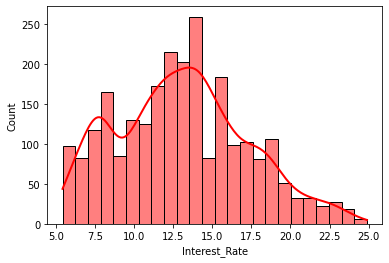

In [243]:
sns.histplot(df_cleaned.Interest_Rate , kde = True , line_kws = {'linewidth': 2} , color = 'red')
plt.show()

In [244]:
print("skewness :",df_cleaned.Interest_Rate.skew())
print("kurtosis :",df_cleaned.Interest_Rate.kurtosis())

skewness : 0.2797216746199095
kurtosis : -0.46030477146197457


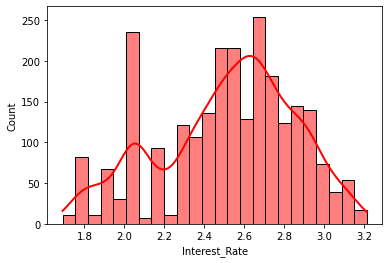

In [245]:
# By taking log.

sns.histplot(np.log(df_cleaned.Interest_Rate) , kde = True , line_kws = {'linewidth': 2} , color = 'red')
plt.show()

In [246]:
print("skewness :",np.log(df_cleaned.Interest_Rate).skew())
print("kurtosis :",np.log(df_cleaned.Interest_Rate).kurtosis())

skewness : -0.3951060498317453
kurtosis : -0.5439036242758348


In [247]:
df_cleaned[['ln_Interest_Rate']] =  np.log(df_cleaned.Interest_Rate)

In [248]:
df_cleaned.head()

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_Avg,...,State_WA,State_WI,State_WV,State_WY,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,Interest_Rate,ln_Interest_Rate
0,20000.0,20000.0,36,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,0,0,0,0,8.90,2.186051
1,19200.0,19200.0,36,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,0,0,0,0,12.12,2.494857
2,35000.0,35000.0,60,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,...,0,0,0,0,0,0,0,0,21.98,3.090133
3,10000.0,9975.0,36,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,...,0,0,0,0,0,0,0,0,9.99,2.301585
4,12000.0,12000.0,36,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,...,0,0,0,0,0,0,0,1,11.71,2.460443


In [249]:
del df_cleaned['Interest_Rate']

In [250]:
df_cleaned.head()

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_Avg,...,State_VT,State_WA,State_WI,State_WV,State_WY,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,ln_Interest_Rate
0,20000.0,20000.0,36,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,0,0,0,0,0,2.186051
1,19200.0,19200.0,36,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,0,0,0,0,0,2.494857
2,35000.0,35000.0,60,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,...,0,0,0,0,0,0,0,0,0,3.090133
3,10000.0,9975.0,36,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,...,0,0,0,0,0,0,0,0,0,2.301585
4,12000.0,12000.0,36,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,...,0,0,0,0,0,0,0,0,1,2.460443


<span style = 'color: brown'> <b> Checking for Correlation between x and y.

In [251]:
corr_xy = df_num.corrwith(df_cleaned.ln_Interest_Rate)

In [252]:
corr_xy

Amount_Requested                  0.303174
Amount_Funded_By_Investors        0.303408
Loan_Length                       0.386748
Debt_To_Income_Ratio              0.178853
Monthly_Income                    0.014976
Open_CREDIT_Lines                 0.068893
Revolving_CREDIT_Balance          0.080187
Inquiries_in_the_Last_6_Months    0.176739
Employment_Length                 0.035160
FICO_Avg                         -0.744521
dtype: float64

<span style = 'color: brown'> <b> Checking for Correlation between x and x.

In [253]:
corr_matrix = df_num.corr()

In [254]:
corr_matrix

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_Avg
Amount_Requested,1.000000,0.970316,0.412746,0.081892,0.458711,0.194608,0.343016,-0.022750,0.163417,0.081760
Amount_Funded_By_Investors,0.970316,1.000000,0.406672,0.093660,0.435993,0.185690,0.325129,-0.056091,0.168004,0.071906
Loan_Length,0.412746,0.406672,1.000000,0.025909,0.104674,0.043451,0.081257,0.030933,0.073696,0.011219
Debt_To_Income_Ratio,0.081892,0.093660,0.025909,1.000000,-0.170128,0.370340,0.219450,0.012169,0.048350,-0.218463
Monthly_Income,0.458711,0.435993,0.104674,-0.170128,1.000000,0.226464,0.434905,0.039760,0.107404,0.117566
Open_CREDIT_Lines,0.194608,0.185690,0.043451,0.370340,0.226464,1.000000,0.316148,0.106528,0.064989,-0.091544
Revolving_CREDIT_Balance,0.343016,0.325129,0.081257,0.219450,0.434905,0.316148,1.000000,-0.018604,0.155698,-0.009485
Inquiries_in_the_Last_6_Months,-0.022750,-0.056091,0.030933,0.012169,0.039760,0.106528,-0.018604,1.000000,-0.010593,-0.088390
Employment_Length,0.163417,0.168004,0.073696,0.048350,0.107404,0.064989,0.155698,-0.010593,1.000000,0.016769
FICO_Avg,0.081760,0.071906,0.011219,-0.218463,0.117566,-0.091544,-0.009485,-0.088390,0.016769,1.000000


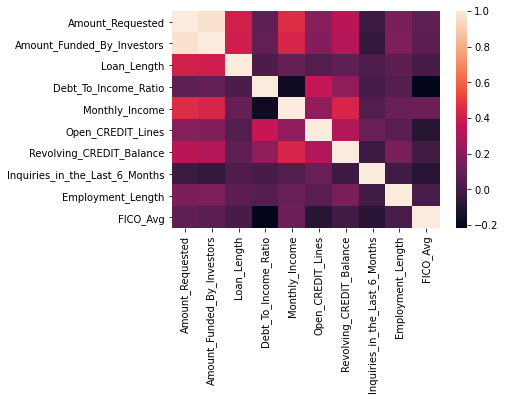

In [255]:
sns.heatmap(corr_matrix)
plt.show()

In [256]:
corr_matrix.to_excel('Correlation_Matrix.xlsx')

### <span style = 'color : green'> Data Preparation Level 3.(Feature Reduction)

### Feature Reduction Methonds :
<b> 1- RFE(Recussive Feature Elemination) <br>
<b> 2- Univariate Regression <br>
<b> 3- K best <br>
<b> 4- Correlation between x and y <br>
<b> 5- Correlation between x and y <br>
<b> 6- Variance Inflation Faction(VIF) = 1/(1-(R)sqr) <br> 
    
-Method 1st to 4th check which variable is important by identifying how much they are related to y variable. <br>
-Method 5th and 6th drop the variables by checking for multicollinearity.

In [257]:
df_cleaned.shape

(2498, 73)

In [258]:
df_cleaned.head()

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,FICO_Avg,...,State_VT,State_WA,State_WI,State_WV,State_WY,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT,ln_Interest_Rate
0,20000.0,20000.0,36,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,0,0,0,0,0,2.186051
1,19200.0,19200.0,36,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,0,0,0,0,0,2.494857
2,35000.0,35000.0,60,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,...,0,0,0,0,0,0,0,0,0,3.090133
3,10000.0,9975.0,36,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,...,0,0,0,0,0,0,0,0,0,2.301585
4,12000.0,12000.0,36,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,...,0,0,0,0,0,0,0,0,1,2.460443


In [259]:
target = df_cleaned.ln_Interest_Rate

In [260]:
features = df_cleaned[df_cleaned.columns.difference(['ln_Interest_Rate'])]

### <span style = 'color : purple'> RFE(Recussive Feature Elemination)

In [261]:
from sklearn.feature_selection import RFE

In [262]:
from sklearn.linear_model import LinearRegression

In [263]:
# Initialize the Linear Regression Model

lm = LinearRegression()

In [264]:
### Initlalzing the RFE Model

rfe = RFE(lm, n_features_to_select=10)

In [265]:
# Fit the RFE model

rfe = rfe.fit(features , target)

In [266]:
rfe.get_support()

array([False, False, False, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False,  True, False, False,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False])

In [267]:
RFE_imp_vars = features.columns[rfe.get_support()]

In [268]:
list(RFE_imp_vars)

['Home_Ownership_NONE',
 'Home_Ownership_OTHER',
 'Loan_Purpose_credit_card',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_house',
 'Loan_Purpose_moving',
 'Loan_Purpose_other',
 'Loan_Purpose_small_business',
 'State_MT',
 'State_SD']

### <span style = 'color : purple'> F Regression (Univariate Regression)

In [269]:
from sklearn.feature_selection import f_regression

In [270]:
f_values , p_values = f_regression(features , target)

In [271]:
f_values

array([2.53068799e+02, 2.52639373e+02, 8.24818084e+01, 3.08936751e+00,
       3.10432214e+03, 2.26316089e+00, 2.60049711e+00, 5.33974239e-01,
       1.89612018e+01, 8.04810286e+01, 4.39000181e+02, 5.79770629e-02,
       4.62233711e+01, 3.30734792e+00, 2.50543837e+01, 2.61849668e-02,
       3.15529188e+01, 5.24223050e+00, 2.75054394e-01, 1.61225483e-01,
       2.44777443e+00, 3.17086049e-01, 1.70937075e+00, 1.98291018e+00,
       5.59965258e-01, 1.19031817e+01, 1.61530294e+01, 9.84895566e-05,
       7.10126286e-02, 1.79440099e-01, 2.38325044e-02, 2.88912908e-02,
       9.98410445e-01, 1.62741457e-01, 5.04860370e-01, 1.87326569e-01,
       1.74013382e+00, 4.87168462e+00, 1.52245985e-01, 1.24991864e+00,
       2.29878909e-02, 5.68417026e-01, 4.86273388e-01, 3.60021730e+00,
       5.82610799e-01, 3.73138077e-02, 6.35170261e+00, 9.98892533e-01,
       2.81118909e-01, 4.81217878e-01, 2.38107986e+00, 8.34938625e-01,
       1.52725185e+00, 2.58407288e-01, 1.15209711e+00, 3.47876153e-01,
      

In [272]:
p_values

array([2.38312609e-54, 2.89834588e-54, 2.11126181e-19, 7.89280041e-02,
       0.00000000e+00, 1.32609925e-01, 1.06956621e-01, 4.65009367e-01,
       1.38784612e-05, 5.62744994e-19, 6.32631803e-90, 8.09742100e-01,
       1.31538533e-11, 6.90905077e-02, 5.96204067e-07, 8.71462514e-01,
       2.15583750e-08, 2.21280999e-02, 6.00007789e-01, 6.88065116e-01,
       1.17818397e-01, 5.73414685e-01, 1.91187451e-01, 1.59208699e-01,
       4.54344743e-01, 5.69685402e-04, 6.01550571e-05, 9.92082565e-01,
       7.89890072e-01, 6.71891352e-01, 8.77324340e-01, 8.65044058e-01,
       3.17792296e-01, 6.86679519e-01, 4.77438650e-01, 6.65188462e-01,
       1.87242872e-01, 2.73915256e-02, 6.96431483e-01, 2.63675609e-01,
       8.79500819e-01, 4.50959750e-01, 4.85659332e-01, 5.78873235e-02,
       4.45362923e-01, 8.46843254e-01, 1.17887652e-02, 3.17675511e-01,
       5.96015943e-01, 4.87935735e-01, 1.22939392e-01, 3.60936605e-01,
       2.16641656e-01, 6.11261410e-01, 2.83214338e-01, 5.55371244e-01,
      

In [273]:
f_values = pd.Series(f_values)
p_values = pd.Series(p_values)
col = pd.Series(features.columns)

In [274]:
f_reg_res = pd.concat([col , f_values , p_values],axis = 1)

In [275]:
f_reg_res.head()

,0,1,2
0,Amount_Funded_By_Investors,253.068799,2.383126e-54
1,Amount_Requested,252.639373,2.898346e-54
2,Debt_To_Income_Ratio,82.481808,2.111262e-19
3,Employment_Length,3.089368,7.892800e-02
4,FICO_Avg,3104.322139,0.000000e+00


In [276]:
f_reg_res.columns = ['cols','f_values','p_values']

In [277]:
top10_f_reg_res = f_reg_res.sort_values(by = ['f_values'] , ascending = False).head(10)

In [278]:
top10_f_reg_res

,cols,f_values,p_values
4,FICO_Avg,3104.322139,0.000000e+00
10,Loan_Length,439.000181,6.326318e-90
0,Amount_Funded_By_Investors,253.068799,2.383126e-54
1,Amount_Requested,252.639373,2.898346e-54
2,Debt_To_Income_Ratio,82.481808,2.111262e-19
9,Inquiries_in_the_Last_6_Months,80.481029,5.627450e-19
12,Loan_Purpose_debt_consolidation,46.223371,1.315385e-11
16,Loan_Purpose_major_purchase,31.552919,2.155838e-08
14,Loan_Purpose_home_improvement,25.054384,5.962041e-07
8,Home_Ownership_RENT,18.961202,1.387846e-05


In [279]:
list(top10_f_reg_res.cols)

['FICO_Avg',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT']

### <span style = 'color : purple'> K-Best

In [280]:
from sklearn.feature_selection import SelectKBest , f_classif , chi2

In [281]:
## Initalize the K Best Model

selector = SelectKBest(f_classif, k=10)

In [282]:
# fit the model

selector.fit(features,target)

c:\users\vanshika chandra\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


SelectKBest()

In [283]:
k_best_top10 = features.columns[selector.get_support()]

In [284]:
list(k_best_top10)

['Amount_Funded_By_Investors',
 'FICO_Avg',
 'Home_Ownership_NONE',
 'Home_Ownership_OTHER',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_educational',
 'State_IA',
 'State_IN',
 'State_MS']

### <span style = 'color : purple'> Correlation between x and y

In [285]:
corr_x_y = df_cleaned.corrwith(df_cleaned.ln_Interest_Rate)

In [286]:
corr_x_y

Amount_Requested              0.303174
Amount_Funded_By_Investors    0.303408
Loan_Length                   0.386748
Debt_To_Income_Ratio          0.178853
Monthly_Income                0.014976
                                ...   
Home_Ownership_NONE          -0.030098
Home_Ownership_OTHER          0.032261
Home_Ownership_OWN           -0.014625
Home_Ownership_RENT           0.086829
ln_Interest_Rate              1.000000
Length: 73, dtype: float64

In [287]:
column_name = pd.Series(list(corr_x_y.index), name = 'column_name')

In [288]:
r_values = pd.Series(list(corr_x_y), name = 'r_values')

In [289]:
corr = pd.concat([column_name , r_values], axis = 1)

In [290]:
corr['r_values_abs'] = np.abs(corr.r_values)

In [291]:
corr

,column_name,r_values,r_values_abs
0,Amount_Requested,0.303174,0.303174
1,Amount_Funded_By_Investors,0.303408,0.303408
2,Loan_Length,0.386748,0.386748
3,Debt_To_Income_Ratio,0.178853,0.178853
4,Monthly_Income,0.014976,0.014976
...,...,...,...
68,Home_Ownership_NONE,-0.030098,0.030098
69,Home_Ownership_OTHER,0.032261,0.032261
70,Home_Ownership_OWN,-0.014625,0.014625
71,Home_Ownership_RENT,0.086829,0.086829


In [292]:
corr_top11 = corr.sort_values(by =['r_values_abs'] , ascending = False ).head(11)

In [293]:
list(corr_top11.column_name)

['ln_Interest_Rate',
 'FICO_Avg',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT']

In [294]:
final_var = {'Home_Ownership_NONE',
 'Home_Ownership_OTHER',
 'Loan_Purpose_credit_card',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_house',
 'Loan_Purpose_moving',
 'Loan_Purpose_other',
 'Loan_Purpose_small_business',
 'State_MT',
 'State_SD',
  'FICO_Avg',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT','Amount_Funded_By_Investors',
 'FICO_Avg',
 'Home_Ownership_NONE',
 'Home_Ownership_OTHER',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Length',
 'Loan_Purpose_educational',
 'State_IA',
 'State_IN',
 'State_MS',
 'FICO_Avg',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Amount_Requested',
 'Debt_To_Income_Ratio',
 'Inquiries_in_the_Last_6_Months',
 'Loan_Purpose_debt_consolidation',
 'Loan_Purpose_major_purchase',
 'Loan_Purpose_home_improvement',
 'Home_Ownership_RENT'}

In [295]:
final_var = list(final_var)

In [296]:
final_var

['Loan_Purpose_house',
 'Loan_Purpose_debt_consolidation',
 'Home_Ownership_OTHER',
 'Loan_Purpose_major_purchase',
 'State_IA',
 'State_IN',
 'Loan_Length',
 'Amount_Funded_By_Investors',
 'Loan_Purpose_credit_card',
 'Inquiries_in_the_Last_6_Months',
 'Amount_Requested',
 'Loan_Purpose_home_improvement',
 'Loan_Purpose_small_business',
 'Home_Ownership_RENT',
 'State_SD',
 'Debt_To_Income_Ratio',
 'State_MT',
 'Home_Ownership_NONE',
 'FICO_Avg',
 'Loan_Purpose_moving',
 'Loan_Purpose_other',
 'Loan_Purpose_educational',
 'State_MS']

### <span style = 'color : purple'> Variance Inflation Faction(VIF)

In [297]:
features2 = df_cleaned[final_var]

In [298]:
features2.shape

(2498, 23)

In [299]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [300]:
from patsy import dmatrices

In [301]:
VIF = [variance_inflation_factor(features2.values,i) for i in range(features2.shape[1])]

In [302]:
VIF = pd.Series(VIF, name = 'VIF')

In [303]:
col2 = pd.Series(features2.columns, name = 'Columns Name')

In [304]:
VIF_res = pd.concat([col2 , VIF], axis = 1)

In [305]:
VIF_top10 = VIF_res.sort_values(by = 'VIF').head(10)

In [306]:
VIF_top10

,Columns Name,VIF
14,State_SD,1.006085
17,Home_Ownership_NONE,1.007687
16,State_MT,1.008256
5,State_IN,1.012929
21,Loan_Purpose_educational,1.112349
0,Loan_Purpose_house,1.140787
19,Loan_Purpose_moving,1.200542
22,State_MS,1.336362
4,State_IA,1.345333
12,Loan_Purpose_small_business,1.611790


In [307]:
features2.columns

Index(['Loan_Purpose_house', 'Loan_Purpose_debt_consolidation',
       'Home_Ownership_OTHER', 'Loan_Purpose_major_purchase', 'State_IA',
       'State_IN', 'Loan_Length', 'Amount_Funded_By_Investors',
       'Loan_Purpose_credit_card', 'Inquiries_in_the_Last_6_Months',
       'Amount_Requested', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_small_business', 'Home_Ownership_RENT', 'State_SD',
       'Debt_To_Income_Ratio', 'State_MT', 'Home_Ownership_NONE', 'FICO_Avg',
       'Loan_Purpose_moving', 'Loan_Purpose_other', 'Loan_Purpose_educational',
       'State_MS'],
      dtype='object')

In [308]:
final_var.append('ln_Interest_Rate')

In [309]:
df_final = df_cleaned[final_var]

In [310]:
df_final.head()

,Loan_Purpose_house,Loan_Purpose_debt_consolidation,Home_Ownership_OTHER,Loan_Purpose_major_purchase,State_IA,State_IN,Loan_Length,Amount_Funded_By_Investors,Loan_Purpose_credit_card,Inquiries_in_the_Last_6_Months,...,State_SD,Debt_To_Income_Ratio,State_MT,Home_Ownership_NONE,FICO_Avg,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_educational,State_MS,ln_Interest_Rate
0,0,1,0,0,0,0,36,20000.0,0,2.0,...,0,14.90,0,0,737.0,0,0,0,0,2.186051
1,0,1,0,0,0,0,36,19200.0,0,1.0,...,0,28.36,0,0,717.0,0,0,0,0,2.494857
2,0,1,0,0,0,0,60,35000.0,0,1.0,...,0,23.81,0,0,692.0,0,0,0,0,3.090133
3,0,1,0,0,0,0,36,9975.0,0,0.0,...,0,14.30,0,0,697.0,0,0,0,0,2.301585
4,0,0,0,0,0,0,36,12000.0,1,0.0,...,0,18.78,0,0,697.0,0,0,0,0,2.460443


### <span style = 'color : green'> Data Preparation Level 4 (Train and Test)

In [311]:
from sklearn.model_selection import train_test_split

In [312]:
df_final.columns

Index(['Loan_Purpose_house', 'Loan_Purpose_debt_consolidation',
       'Home_Ownership_OTHER', 'Loan_Purpose_major_purchase', 'State_IA',
       'State_IN', 'Loan_Length', 'Amount_Funded_By_Investors',
       'Loan_Purpose_credit_card', 'Inquiries_in_the_Last_6_Months',
       'Amount_Requested', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_small_business', 'Home_Ownership_RENT', 'State_SD',
       'Debt_To_Income_Ratio', 'State_MT', 'Home_Ownership_NONE', 'FICO_Avg',
       'Loan_Purpose_moving', 'Loan_Purpose_other', 'Loan_Purpose_educational',
       'State_MS', 'ln_Interest_Rate'],
      dtype='object')

In [313]:
train,test = train_test_split(df_final, test_size = 0.3, random_state = 123)

In [314]:
print("The number of rows in the train dataset are",len(train))
print("The number of rows in the test dataset are",len(test))
print("The number of rows in the original dataset are",len(df_final))

The number of rows in the train dataset are 1748
The number of rows in the test dataset are 750
The number of rows in the original dataset are 2498


### <span style = 'color : green'> Model Implementation

In [315]:
y = 'ln_Interest_Rate'

In [316]:
s = str()

In [317]:
for i in train.columns.tolist():
    s = s + '+' + i

In [318]:
equation = s[1:]

In [319]:
equation

'Loan_Purpose_house+Loan_Purpose_debt_consolidation+Home_Ownership_OTHER+Loan_Purpose_major_purchase+State_IA+State_IN+Loan_Length+Amount_Funded_By_Investors+Loan_Purpose_credit_card+Inquiries_in_the_Last_6_Months+Amount_Requested+Loan_Purpose_home_improvement+Loan_Purpose_small_business+Home_Ownership_RENT+State_SD+Debt_To_Income_Ratio+State_MT+Home_Ownership_NONE+FICO_Avg+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_educational+State_MS+ln_Interest_Rate'

In [320]:
equation = equation.replace("+ln_Interest_Rate","")

In [321]:
equation

'Loan_Purpose_house+Loan_Purpose_debt_consolidation+Home_Ownership_OTHER+Loan_Purpose_major_purchase+State_IA+State_IN+Loan_Length+Amount_Funded_By_Investors+Loan_Purpose_credit_card+Inquiries_in_the_Last_6_Months+Amount_Requested+Loan_Purpose_home_improvement+Loan_Purpose_small_business+Home_Ownership_RENT+State_SD+Debt_To_Income_Ratio+State_MT+Home_Ownership_NONE+FICO_Avg+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_educational+State_MS'

In [322]:
equation= y + '~' + equation

In [323]:
equation

'ln_Interest_Rate~Loan_Purpose_house+Loan_Purpose_debt_consolidation+Home_Ownership_OTHER+Loan_Purpose_major_purchase+State_IA+State_IN+Loan_Length+Amount_Funded_By_Investors+Loan_Purpose_credit_card+Inquiries_in_the_Last_6_Months+Amount_Requested+Loan_Purpose_home_improvement+Loan_Purpose_small_business+Home_Ownership_RENT+State_SD+Debt_To_Income_Ratio+State_MT+Home_Ownership_NONE+FICO_Avg+Loan_Purpose_moving+Loan_Purpose_other+Loan_Purpose_educational+State_MS'

In [324]:
import statsmodels.formula.api as smf

In [325]:
## Initalise the model and then fit the model

model = smf.ols(equation, data=train).fit()

In [326]:
print(model.summary2())

                        Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.772     
Dependent Variable:      ln_Interest_Rate     AIC:                    -1384.7877
Date:                    2021-07-07 13:14     BIC:                    -1253.5982
No. Observations:        1748                 Log-Likelihood:         716.39    
Df Model:                23                   F-statistic:            258.7     
Df Residuals:            1724                 Prob (F-statistic):     0.00      
R-squared:               0.775                Scale:                  0.026155  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                        7.1366   0.0913  78.2059 0.0000  6.9577  7.3156
Loan_Purpose_house               0.0606   0.0479   1.

In [327]:
### Iteration 2

formula = 'ln_Interest_Rate~Loan_Purpose_other+Loan_Purpose_credit_card+State_MS+Amount_Funded_By_Investors+FICO_Avg+Debt_To_Income_Ratio+Loan_Purpose_home_improvement+Home_Ownership_OTHER+Loan_Purpose_educational+State_SD+Loan_Purpose_moving+Loan_Purpose_house+Loan_Purpose_debt_consolidation+Home_Ownership_RENT+Loan_Purpose_small_business+Amount_Requested+State_IN+Home_Ownership_NONE+Inquiries_in_the_Last_6_Months+Loan_Length+State_IA+Loan_Purpose_major_purchase'

In [328]:
model = smf.ols(formula, data=train).fit()

In [329]:
print(model.summary2())

                        Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.772     
Dependent Variable:      ln_Interest_Rate     AIC:                    -1386.7781
Date:                    2021-07-07 13:14     BIC:                    -1261.0549
No. Observations:        1748                 Log-Likelihood:         716.39    
Df Model:                22                   F-statistic:            270.6     
Df Residuals:            1725                 Prob (F-statistic):     0.00      
R-squared:               0.775                Scale:                  0.026140  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                        7.1370   0.0912  78.2852 0.0000  6.9582  7.3158
Loan_Purpose_other               0.0634   0.0212   2.

In [330]:
### Iteration 3

formula = 'ln_Interest_Rate~Loan_Purpose_other+Loan_Purpose_credit_card+State_MS+Amount_Funded_By_Investors+FICO_Avg+Debt_To_Income_Ratio+Loan_Purpose_home_improvement+Loan_Purpose_educational+State_SD+Loan_Purpose_moving+Loan_Purpose_house+Loan_Purpose_debt_consolidation+Home_Ownership_RENT+Loan_Purpose_small_business+Amount_Requested+State_IN+Home_Ownership_NONE+Inquiries_in_the_Last_6_Months+Loan_Length+State_IA+Loan_Purpose_major_purchase'

In [331]:
model = smf.ols(formula, data=train).fit()

In [332]:
print(model.summary2())

                        Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.773     
Dependent Variable:      ln_Interest_Rate     AIC:                    -1388.6933
Date:                    2021-07-07 13:14     BIC:                    -1268.4363
No. Observations:        1748                 Log-Likelihood:         716.35    
Df Model:                21                   F-statistic:            283.7     
Df Residuals:            1726                 Prob (F-statistic):     0.00      
R-squared:               0.775                Scale:                  0.026126  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
Intercept                        7.1375   0.0911  78.3303 0.0000  6.9588  7.3163
Loan_Purpose_other               0.0634   0.0212   2.

In [333]:
### Iteration 4

formula = 'ln_Interest_Rate~Loan_Purpose_other+Loan_Purpose_credit_card+State_MS+Amount_Funded_By_Investors+FICO_Avg+Debt_To_Income_Ratio+Loan_Purpose_home_improvement+Loan_Purpose_educational+State_SD+Loan_Purpose_moving+Loan_Purpose_house+Home_Ownership_RENT+Loan_Purpose_small_business+Amount_Requested+State_IN+Home_Ownership_NONE+Inquiries_in_the_Last_6_Months+Loan_Length+State_IA+Loan_Purpose_major_purchase'

In [334]:
model = smf.ols(formula, data=train).fit()

In [335]:
print(model.summary2())

                        Results: Ordinary least squares
Model:                  OLS                  Adj. R-squared:         0.773     
Dependent Variable:     ln_Interest_Rate     AIC:                    -1390.4950
Date:                   2021-07-07 13:14     BIC:                    -1275.7042
No. Observations:       1748                 Log-Likelihood:         716.25    
Df Model:               20                   F-statistic:            298.0     
Df Residuals:           1727                 Prob (F-statistic):     0.00      
R-squared:              0.775                Scale:                  0.026114  
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                       7.1477   0.0881  81.1032 0.0000  6.9749  7.3206
Loan_Purpose_other              0.0567   0.0148   3.8290 0.0001 

In [336]:
### Iteration 5

formula = 'ln_Interest_Rate~Loan_Purpose_other+Loan_Purpose_credit_card+State_MS+Amount_Funded_By_Investors+FICO_Avg+Debt_To_Income_Ratio+Loan_Purpose_home_improvement+State_SD+Loan_Purpose_moving+Loan_Purpose_house+Home_Ownership_RENT+Loan_Purpose_small_business+Amount_Requested+State_IN+Home_Ownership_NONE+Inquiries_in_the_Last_6_Months+Loan_Length+State_IA+Loan_Purpose_major_purchase'

In [337]:
model = smf.ols(formula , data = train).fit()

In [338]:
print(model.summary2())

                        Results: Ordinary least squares
Model:                  OLS                  Adj. R-squared:         0.773     
Dependent Variable:     ln_Interest_Rate     AIC:                    -1392.2041
Date:                   2021-07-07 13:14     BIC:                    -1282.8795
No. Observations:       1748                 Log-Likelihood:         716.10    
Df Model:               19                   F-statistic:            313.8     
Df Residuals:           1728                 Prob (F-statistic):     0.00      
R-squared:              0.775                Scale:                  0.026103  
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                       7.1470   0.0881  81.1215 0.0000  6.9742  7.3198
Loan_Purpose_other              0.0562   0.0148   3.8037 0.0001 

In [339]:
### Iteration 6

formula = 'ln_Interest_Rate~Loan_Purpose_other+Loan_Purpose_credit_card+State_MS+Amount_Funded_By_Investors+FICO_Avg+Debt_To_Income_Ratio+Loan_Purpose_home_improvement+State_SD+Loan_Purpose_moving+Loan_Purpose_house+Home_Ownership_RENT+Loan_Purpose_small_business+Amount_Requested+State_IN+Home_Ownership_NONE+Inquiries_in_the_Last_6_Months+Loan_Length+Loan_Purpose_major_purchase'

In [340]:
model = smf.ols(formula , data = train).fit()

In [341]:
print(model.summary2())

                        Results: Ordinary least squares
Model:                  OLS                  Adj. R-squared:         0.773     
Dependent Variable:     ln_Interest_Rate     AIC:                    -1393.4486
Date:                   2021-07-07 13:14     BIC:                    -1289.5902
No. Observations:       1748                 Log-Likelihood:         715.72    
Df Model:               18                   F-statistic:            331.2     
Df Residuals:           1729                 Prob (F-statistic):     0.00      
R-squared:              0.775                Scale:                  0.026099  
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                       7.1444   0.0880  81.1448 0.0000  6.9717  7.3171
Loan_Purpose_other              0.0564   0.0148   3.8197 0.0001 

In [342]:
# After Final Iteration

my_formula_last_iteration = 'ln_Interest_Rate~Loan_Length+FICO_Avg+Inquiries_in_the_Last_6_Months+Amount_Requested'

In [343]:
## Initalise the model and then fit the model

model = smf.ols(my_formula_last_iteration, data=train).fit()

print(model.summary2())

                        Results: Ordinary least squares
Model:                  OLS                  Adj. R-squared:         0.767     
Dependent Variable:     ln_Interest_Rate     AIC:                    -1361.7651
Date:                   2021-07-07 13:14     BIC:                    -1334.4340
No. Observations:       1748                 Log-Likelihood:         685.88    
Df Model:               4                    F-statistic:            1437.     
Df Residuals:           1743                 Prob (F-statistic):     0.00      
R-squared:              0.767                Scale:                  0.026789  
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                       7.1412   0.0817  87.4230 0.0000  6.9810  7.3015
Loan_Length                     0.0102   0.0004  23.7083 0.0000 

# POST MODELING

In [344]:
train['Interest_rate'] = np.exp(train.ln_Interest_Rate)

<ipython-input-344-4fd07d83acde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Interest_rate'] = np.exp(train.ln_Interest_Rate)


In [345]:
test['Interest_rate'] = np.exp(test.ln_Interest_Rate)

<ipython-input-345-07f26c582b25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Interest_rate'] = np.exp(test.ln_Interest_Rate)


In [346]:
train['pred'] = np.exp(model.predict(train))

<ipython-input-346-66a7522add51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['pred'] = np.exp(model.predict(train))


In [347]:
test['pred'] = np.exp(model.predict(test))

<ipython-input-347-487a84dc77d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = np.exp(model.predict(test))


In [348]:
del train['ln_Interest_Rate']

In [349]:
del test['ln_Interest_Rate']

In [350]:
train.head()

,Loan_Purpose_house,Loan_Purpose_debt_consolidation,Home_Ownership_OTHER,Loan_Purpose_major_purchase,State_IA,State_IN,Loan_Length,Amount_Funded_By_Investors,Loan_Purpose_credit_card,Inquiries_in_the_Last_6_Months,...,Debt_To_Income_Ratio,State_MT,Home_Ownership_NONE,FICO_Avg,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_educational,State_MS,Interest_rate,pred
1782,0,0,0,0,0,0,36,7000.0,1,0.0,...,7.65,0,0,712.0,0,0,0,0,7.90,10.399536
1646,0,1,0,0,0,0,36,3000.0,0,0.0,...,12.85,0,0,732.0,0,0,0,0,7.14,8.600142
797,0,1,0,0,0,0,60,16750.0,0,0.0,...,21.88,0,0,667.0,0,0,0,0,21.48,20.509427
2269,0,0,0,0,0,0,60,7200.0,0,3.0,...,15.14,0,0,672.0,0,1,0,0,20.49,19.764953
2234,0,0,0,0,0,0,60,5975.0,0,0.0,...,6.60,0,0,662.0,0,0,0,0,17.14,18.966357


In [351]:
test.head()

,Loan_Purpose_house,Loan_Purpose_debt_consolidation,Home_Ownership_OTHER,Loan_Purpose_major_purchase,State_IA,State_IN,Loan_Length,Amount_Funded_By_Investors,Loan_Purpose_credit_card,Inquiries_in_the_Last_6_Months,...,Debt_To_Income_Ratio,State_MT,Home_Ownership_NONE,FICO_Avg,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_educational,State_MS,Interest_rate,pred
1239,0,0,0,0,0,0,36,30225.0000,1,0.0,...,28.150,0,0,712.0,0,0,0,0,17.77,13.333052
2065,0,0,0,0,0,0,60,29175.0000,1,2.0,...,8.830,0,0,697.0,0,0,0,0,21.00,20.106419
2441,0,0,0,0,0,0,60,12000.0000,1,0.0,...,9.550,0,0,707.0,0,0,0,0,12.68,14.522388
2096,0,1,0,0,0,0,60,14450.0000,0,0.0,...,8.080,0,0,767.0,0,0,0,0,9.99,10.617680
289,0,0,0,0,0,0,36,996.6912,0,1.0,...,0.716,0,0,732.0,0,0,0,0,10.36,8.755915


# MODEL EVALUATION

In [352]:
# MAPE = Mean Absolute Percentage Error (It gives us the error in the model and is between 0 to 1.)
# RMSE = Root Mean Squared Error

In [353]:
from sklearn import metrics
import scipy.stats as stats

##### Evaluation on the Train Dataset

In [354]:
MAPE_train = round(np.mean(np.abs((train.Interest_rate - train.pred)/train.Interest_rate))*100,2)
print('MAPE_train',MAPE_train)

MSE_train = metrics.mean_squared_error(train.Interest_rate , train.pred)
print('MSE_train',MSE_train)

Corr_train = stats.stats.pearsonr(train.Interest_rate , train.pred)
print('Corr_train',Corr_train)

MAPE_train 12.31
MSE_train 3.8111909322902537
Corr_train (0.8838238548646759, 0.0)


##### Evaluation on the Test Dataset

In [355]:
MAPE_test = round(np.mean(np.abs((test.Interest_rate - test.pred)/test.Interest_rate))*100,2)
print('MAPE_train',MAPE_test)

MSE_test = metrics.mean_squared_error(test.Interest_rate , test.pred)
print('MSE_train',MSE_test)

Corr_test = stats.stats.pearsonr(test.Interest_rate , test.pred)
print('Corr_train',Corr_test)

MAPE_train 12.16
MSE_train 4.021787623904999
Corr_train (0.881486692938974, 5.912819521357052e-246)


#### Decile Analysis

###### (train)

In [356]:
train['Deciles'] = pd.qcut(train['pred'] , 10 , labels = False)

<ipython-input-356-70aff5b02dab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Deciles'] = pd.qcut(train['pred'] , 10 , labels = False)


In [357]:
train.head()

,Loan_Purpose_house,Loan_Purpose_debt_consolidation,Home_Ownership_OTHER,Loan_Purpose_major_purchase,State_IA,State_IN,Loan_Length,Amount_Funded_By_Investors,Loan_Purpose_credit_card,Inquiries_in_the_Last_6_Months,...,State_MT,Home_Ownership_NONE,FICO_Avg,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_educational,State_MS,Interest_rate,pred,Deciles
1782,0,0,0,0,0,0,36,7000.0,1,0.0,...,0,0,712.0,0,0,0,0,7.90,10.399536,2
1646,0,1,0,0,0,0,36,3000.0,0,0.0,...,0,0,732.0,0,0,0,0,7.14,8.600142,1
797,0,1,0,0,0,0,60,16750.0,0,0.0,...,0,0,667.0,0,0,0,0,21.48,20.509427,9
2269,0,0,0,0,0,0,60,7200.0,0,3.0,...,0,0,672.0,0,1,0,0,20.49,19.764953,9
2234,0,0,0,0,0,0,60,5975.0,0,0.0,...,0,0,662.0,0,0,0,0,17.14,18.966357,9


In [358]:
avg_actual = train[['Deciles','Interest_rate']].groupby(train.Deciles).mean().sort_index(ascending=False)['Interest_rate']

In [359]:
avg_pred = train[['Deciles','pred']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred']

In [360]:
Decile_analysis_train = pd.concat([avg_actual, avg_pred], axis=1)

In [361]:
Decile_analysis_train = Decile_analysis_train.reset_index()

In [362]:
Decile_analysis_train

,Deciles,Interest_rate,pred
0,9,19.781429,20.182005
1,8,16.740914,16.326958
2,7,15.679714,14.978060
3,6,14.798046,14.133379
4,5,13.701600,13.272129
5,4,12.642286,12.374068
6,3,11.244253,11.332660
7,2,9.732743,10.256884
8,1,8.605143,8.982590
9,0,7.485086,7.000207


###### (test)

In [363]:
test['Deciles'] = pd.qcut(test['pred'] , 10 , labels = False)

<ipython-input-363-b288b5cb4552>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Deciles'] = pd.qcut(test['pred'] , 10 , labels = False)


In [364]:
avg_pred = test[['Deciles','pred']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred']

In [365]:
Decile_analysis_test = pd.concat([avg_actual, avg_pred], axis=1)

In [368]:
Decile_analysis_test = Decile_analysis_test.reset_index()

In [3]:
Decile_analysis_test

NameError: name 'Decile_analysis_test' is not defined

5


2853783

1